In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from components.data_loader import data_loaders
from sklearn.metrics import confusion_matrix, accuracy_score
from model import PointTransformerModel
import warnings
warnings.filterwarnings("ignore")

In [6]:
def load_model(model, model_path):
    model.load_state_dict(torch.load(model_path))
    return model.eval()

def test(model, device, test_loader):
    predicted_labels = []
    true_labels = []

    with torch.no_grad():
        for data in test_loader:
            inputs,labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            predicted_labels.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return predicted_labels, true_labels

In [7]:
def compute_class_accuracy(predicted_labels, true_labels, num_classes):
    class_accuracies = {}
    for cls in range(num_classes):
        cls_indices = np.where(np.array(true_labels) == cls)[0]
        cls_correct = np.sum(np.array(predicted_labels)[cls_indices] == cls)
        cls_accuracy = cls_correct / len(cls_indices) if len(cls_indices) > 0 else 0
        class_accuracies[cls] = cls_accuracy
    return class_accuracies

def generate_confusion_matrix(predicted_labels, true_labels, num_classes):
    return confusion_matrix(true_labels, predicted_labels, labels=list(range(num_classes)))

def plot_confusion_matrix(conf_matrix, num_classes):
    plt.figure(figsize=(20, 20))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

In [14]:
batch_size =16
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
model_path = "models/best_model.pt"
model = PointTransformerModel(input_dim=6).to(device)
model = load_model(model, model_path)
train_loader, test_loader = data_loaders(ROOT_DIR="./data/modelnet40_normal_resampled/",batch_size=batch_size)

current dir  /home/infres/sbenmabr-22/Point_Transformer
The size of train data is 9843
Load processed data from ./data/modelnet40_normal_resampled/modelnet40_train_1024pts_fps.dat...
The size of test data is 2468
Load processed data from ./data/modelnet40_normal_resampled/modelnet40_test_1024pts_fps.dat...


Overall accuracy: 0.9043760129659644
Class accuracies: {0: 1.0, 1: 0.96, 2: 0.98, 3: 0.8, 4: 0.98, 5: 0.99, 6: 0.95, 7: 0.98, 8: 0.98, 9: 1.0, 10: 0.6, 11: 0.9, 12: 0.8488372093023255, 13: 0.95, 14: 0.7906976744186046, 15: 0.2, 16: 0.96, 17: 0.98, 18: 1.0, 19: 0.9, 20: 1.0, 21: 0.95, 22: 0.97, 23: 0.6976744186046512, 24: 0.9, 25: 0.89, 26: 0.84, 27: 0.65, 28: 0.95, 29: 0.8, 30: 0.97, 31: 0.9, 32: 0.8, 33: 0.85, 34: 0.95, 35: 0.98, 36: 0.88, 37: 0.76, 38: 0.5, 39: 0.9}


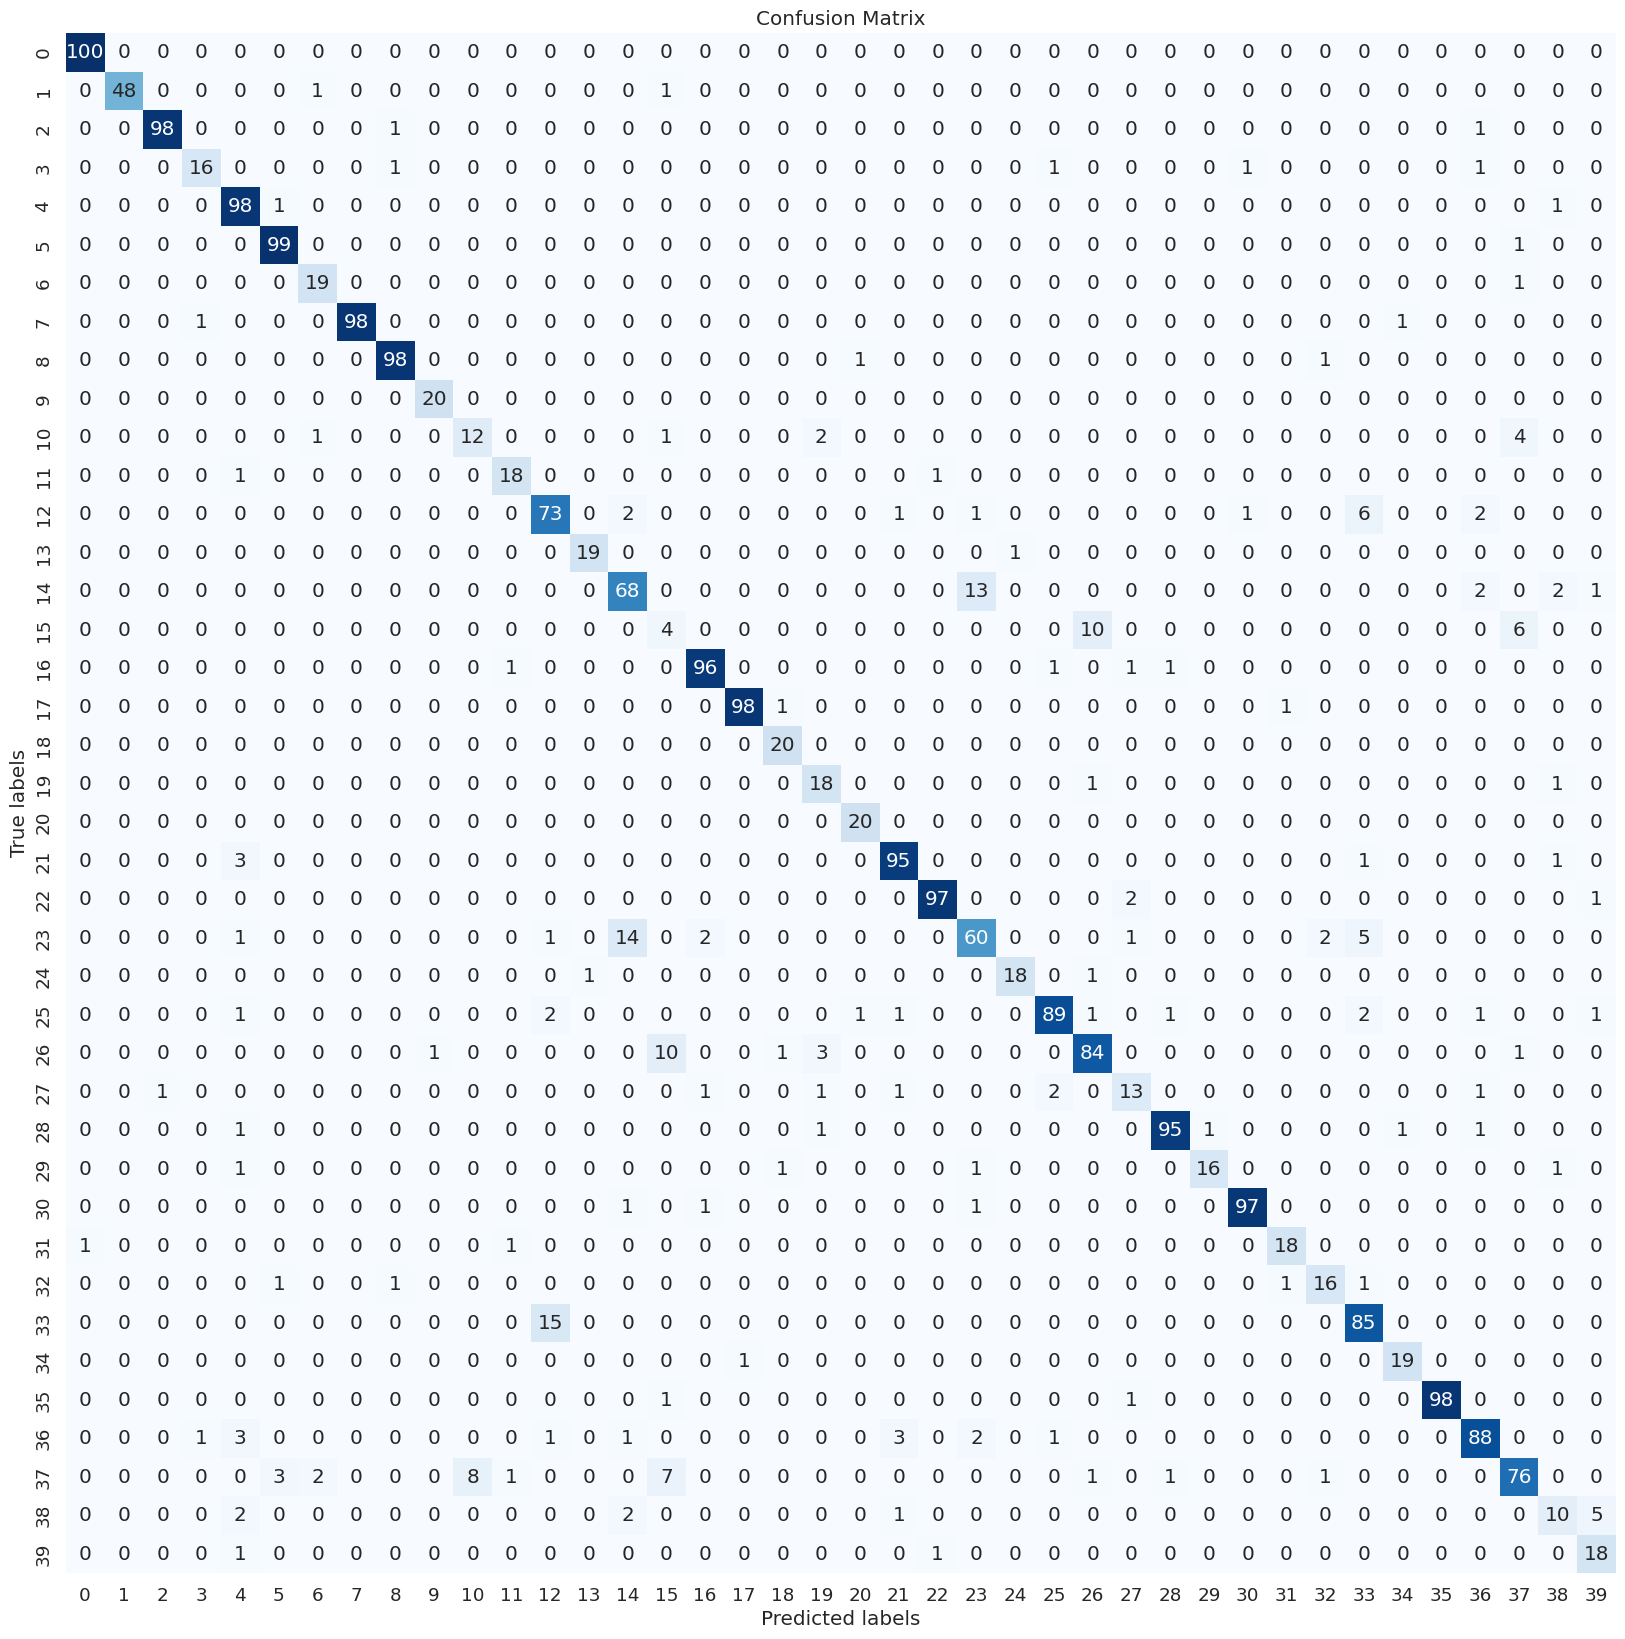

In [15]:
predicted_labels, true_labels = test(model, device, test_loader)
class_accuracies = compute_class_accuracy(predicted_labels, true_labels, num_classes=40)
conf_matrix = generate_confusion_matrix(predicted_labels, true_labels, num_classes=40)
overall_accuracy = accuracy_score(true_labels, predicted_labels)

# Print results
print("Overall accuracy:", overall_accuracy)
print("Class accuracies:", class_accuracies)
plot_confusion_matrix(conf_matrix, num_classes=40)

In [17]:
# Print the table
print("Class Label\tAccuracy")
for label, accuracy in class_accuracies.items():
    print(f"{label}\t\t{accuracy}")

Class Label	Accuracy
0		1.0
1		0.96
2		0.98
3		0.8
4		0.98
5		0.99
6		0.95
7		0.98
8		0.98
9		1.0
10		0.6
11		0.9
12		0.8488372093023255
13		0.95
14		0.7906976744186046
15		0.2
16		0.96
17		0.98
18		1.0
19		0.9
20		1.0
21		0.95
22		0.97
23		0.6976744186046512
24		0.9
25		0.89
26		0.84
27		0.65
28		0.95
29		0.8
30		0.97
31		0.9
32		0.8
33		0.85
34		0.95
35		0.98
36		0.88
37		0.76
38		0.5
39		0.9
